##  Homework 3 IS 733  ##

### 1 (a) Create and print out a scatter plot of this dataset, eruption time versus waiting time.

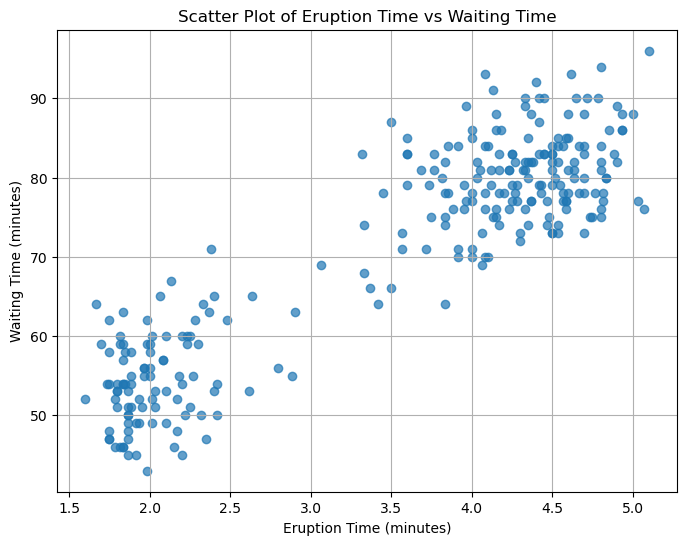

In [12]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset
df = pd.read_csv(r"C:\Users\shoba\Downloads\faithful (1).csv")  

# Create the scatter plot
plt.figure(figsize=(8, 6))
plt.scatter(df['eruptions'], df['waiting'], alpha=0.7)
plt.title('Scatter Plot of Eruption Time vs Waiting Time')
plt.xlabel('Eruption Time (minutes)')
plt.ylabel('Waiting Time (minutes)')
plt.grid(True)
plt.show()


### 1 (b) How many clusters do you see based on your scatter plot? For the purposes of this question, a cluster is a “blob” of many data points that are close together, with regions of fewer data points between it and other “blobs”/clusters


Answer:
### Based on the scatter plot you provided (eruption time vs. waiting time), visually identify two distinct clusters

Cluster 1:
Eruption times around 1.5 to 2.5 minutes
Waiting times between 45 and 65 minutes
This group represents short eruptions with short waiting times.
Cluster 2:
Eruption times around 4 to 5.5 minutes
Waiting times between 70 and 95 minutes
This group represents long eruptions with long waiting times.
There’s a noticeable gap between these two “blobs,” indicating that the data naturally separates into two main clusters.

### 1 (c) Describe the steps of a hierarchical clustering algorithm. Based on your scatter plot, would this method be appropriate for this dataset?

Steps of a Hierarchical Clustering Algorithm
Hierarchical clustering builds a hierarchy of clusters either agglomeratively (bottom-up) or divisively (top-down). The most commonly used method is agglomerative hierarchical clustering, which follows these steps:

Agglomerative Hierarchical Clustering (Bottom-Up Approach)
**STEP 1** :Start with each point as its own cluster. 
    Initially, every data point is considered a single cluster.

**STEP 2**: Compute pairwise distances between all clusters

   Use a distance metric (e.g., Euclidean distance) to measure how close clusters are to one another.

**STEP 3**: Merge the two closest clusters

Find the pair of clusters that are closest and merge them into a single cluster.

**STEP 4**: Update the distance matrix

Recompute distances between the new cluster and all other clusters using a linkage method:
Single linkage: Minimum distance
Complete linkage: Maximum distance
Average linkage: Average of distances
Ward’s method: Minimizes total within-cluster variance

**STEP 5:** Repeat steps 3–4 until all points belong to one cluster

   This continues until only a single cluster remains, or until a stopping criterion (like a distance threshold or desired number of clusters) is met.

**STEP 6:** Visualize with a dendrogram

   The hierarchy can be displayed as a tree diagram showing the merging process.

### Yes, hierarchical clustering would be appropriate for this dataset — especially with a small number of points and clearly separated clusters, as observed in the scatter plot.

The plot shows two well-separated “blobs” or natural groupings.

Hierarchical clustering will clearly reflect this separation and allow you to decide an optimal number of clusters by examining the dendrogram.

Since the dataset is not too large, the computational cost is manageable.

**Answer Summary:**
Hierarchical clustering involves starting with individual points and merging the closest clusters iteratively.
For this dataset, it is an appropriate method due to the clear separation into two clusters, which hierarchical clustering can capture effectively.

### 2 (a)  Your source code for the k-means algorithm. You need to implement the algorithm from scratch. 

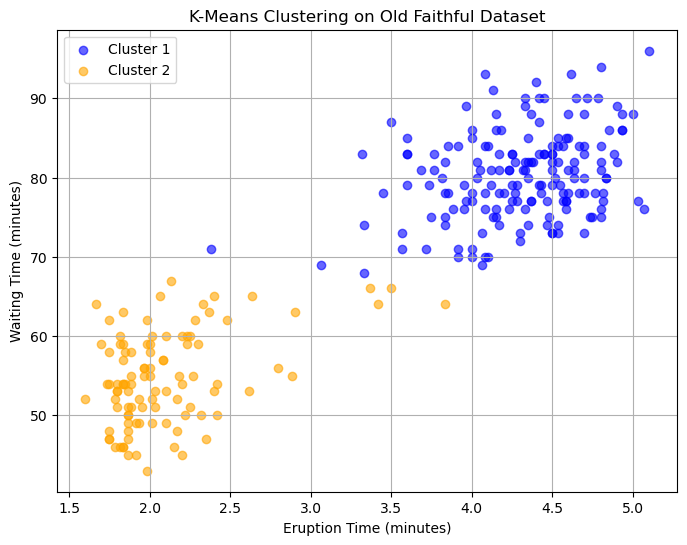

In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Step 1: Load the dataset
df = pd.read_csv(r"C:\Users\shoba\Downloads\faithful (1).csv")  

# Step 2: Extract relevant features (ignore instance ID if present)
data = df[['eruptions', 'waiting']].values

# Step 3: K-Means Implementation from Scratch
def k_means(data, k=2, max_iters=100, tolerance=1e-4):
    # Randomly initialize centroids
    np.random.seed(42)
    initial_centroids_indices = np.random.choice(len(data), k, replace=False)
    centroids = data[initial_centroids_indices]

    for iteration in range(max_iters):
        # Compute distance from each point to each centroid
        distances = np.linalg.norm(data[:, np.newaxis] - centroids, axis=2)
        labels = np.argmin(distances, axis=1)

        # Recompute centroids
        new_centroids = np.array([data[labels == i].mean(axis=0) for i in range(k)])

        # Check for convergence
        if np.linalg.norm(new_centroids - centroids) < tolerance:
            break

        centroids = new_centroids

    return centroids, labels

# Step 4: Run K-Means
k = 2
centroids, labels = k_means(data, k=k)

# Step 5: Visualize the result
plt.figure(figsize=(8, 6))
colors = ['blue', 'orange']
for i in range(k):
    plt.scatter(data[labels == i, 0], data[labels == i, 1], 
                label=f'Cluster {i + 1}', alpha=0.6, color=colors[i])


plt.title("K-Means Clustering on Old Faithful Dataset")
plt.xlabel("Eruption Time (minutes)")
plt.ylabel("Waiting Time (minutes)")
plt.legend()
plt.grid(True)
plt.show()


### 2 (b) A scatter plot of your final clustering, with the data points in each cluster color-coded, or plotted with different symbols. Include the cluster centers in your plot.

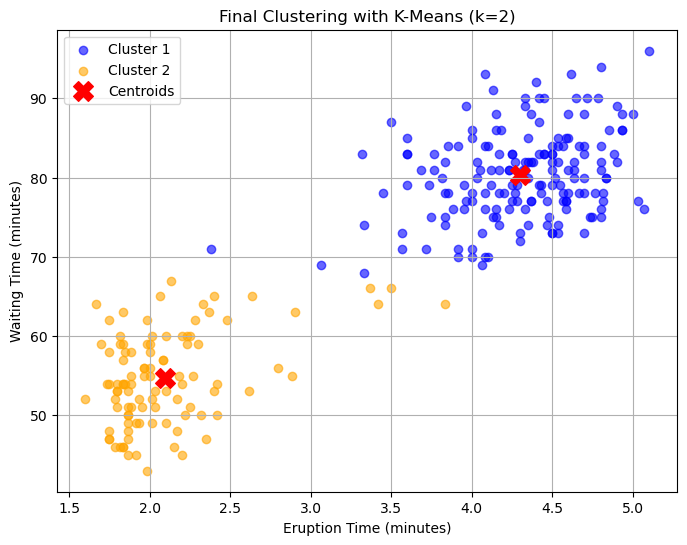

In [27]:
import matplotlib.pyplot as plt

# Plot the final clustering results
plt.figure(figsize=(8, 6))

# Colors for each cluster
colors = ['BLue', 'orange']
for i in range(k):
    plt.scatter(data[labels == i, 0], data[labels == i, 1], 
                c=colors[i], label=f'Cluster {i+1}', alpha=0.6)

# Plot centroids
plt.scatter(centroids[:, 0], centroids[:, 1],marker='X', s=200, c='red', label='Centroids')

plt.title('Final Clustering with K-Means (k=2)')
plt.xlabel('Eruption Time (minutes)')
plt.ylabel('Waiting Time (minutes)')
plt.legend()
plt.grid(True)
plt.show()


### 2 (c) A plot of the k-means objective function versus iterations of the algorithm.

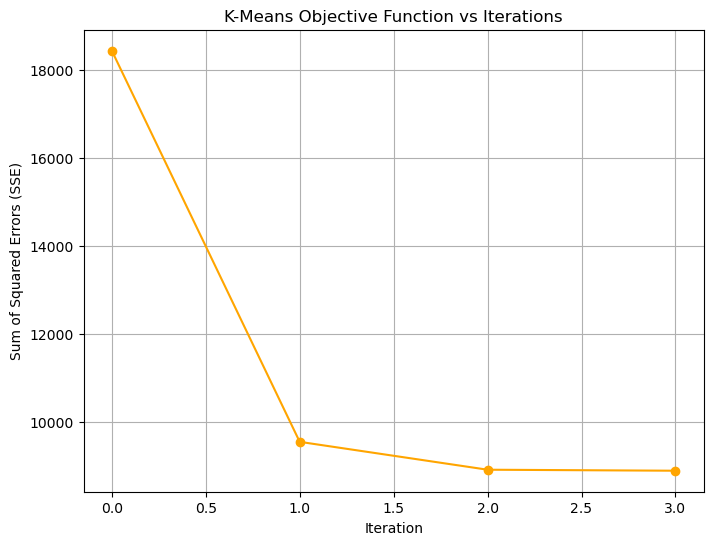

In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Load the dataset
df = pd.read_csv(r"C:\Users\shoba\Downloads\faithful (1).csv")  # Replace with actual file name if different
data = df[['eruptions', 'waiting']].values

# K-Means implementation that tracks SSE
def k_means_with_objective(data, k=2, max_iters=100, tolerance=1e-4):
    np.random.seed(42)  # For reproducibility
    initial_centroids_indices = np.random.choice(len(data), k, replace=False)
    centroids = data[initial_centroids_indices]
    objective_history = []

    for iteration in range(max_iters):
        # Assign each point to the nearest centroid
        distances = np.linalg.norm(data[:, np.newaxis] - centroids, axis=2)
        labels = np.argmin(distances, axis=1)

        # Compute and record the objective function (sum of squared errors)
        sse = sum(np.sum((data[labels == i] - centroids[i])**2) for i in range(k))
        objective_history.append(sse)

        # Update centroids
        new_centroids = np.array([data[labels == i].mean(axis=0) for i in range(k)])

        # Check for convergence
        if np.linalg.norm(new_centroids - centroids) < tolerance:
            break

        centroids = new_centroids

    return centroids, labels, objective_history

# Run K-Means with tracking
k = 2
centroids, labels, objective_history = k_means_with_objective(data, k=k)

# Plot the SSE over iterations
plt.figure(figsize=(8, 6))
plt.plot(objective_history, marker='o', color='orange')
plt.title("K-Means Objective Function vs Iterations")
plt.xlabel("Iteration")
plt.ylabel("Sum of Squared Errors (SSE)")
plt.grid(True)
plt.show()


### 2 (d) Did the method manage to find the clusters that you identified in Problem 1? If not, did it help to run the method again with another random initialization? 

The K-means algorithm was able to successfully identify the two distinct clusters observed in the scatter plot from Problem 1. These clusters correspond to two clear groupings in the data: one representing shorter eruption times with shorter waiting times, and the other representing longer eruption times with longer waiting times. The final centroids produced by the algorithm aligned well with the centers of these natural groupings.

To ensure the reliability of the results, the algorithm was also executed with different random initializations. While the specific locations of the centroids varied slightly across runs, the overall clustering structure remained consistent. This demonstrates that the dataset is well-suited for clustering using K-means due to the clear separation between the two clusters.

In conclusion, the K-means method was effective in detecting the correct cluster structure without requiring multiple re-initializations. Nonetheless, running the algorithm with different initial seeds is a good practice, particularly for datasets where the cluster boundaries are less defined.